<a href="https://colab.research.google.com/github/Edesak/tensorflow-kurz/blob/main/05_transferLearning_finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer learning s fintuning (Prevzate uceni s dotatecnimi zmenami)

In [ ]:
!nvidia-smi


Tue Aug  3 17:31:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Udelani pomocnich funkci

importovani z githubu seznam pomocnich funkci, ktere jsme predtim vytvorili

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-08-03 17:31:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-03 17:31:46 (94.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

##Uvod to tf.keras.aplications

In [ ]:
#Vezmeme 10% z dat 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
#unzip_data(10_food_classes_10_percent.zip)

--2021-08-03 17:31:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   158MB/s    in 1.0s    

2021-08-03 17:31:49 (158 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("/content/10_food_classes_10_percent")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '/content/10_food_classes_10

In [ ]:
#Create train and test

train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
#Predtim jsme pouzivali ImageDataGenerator
#Image dataset from directory novejsi rychlejsi

IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                   image_size = IMG_SIZE,
                                                                   label_mode = "categorical",
                                                                   batch_size = BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10
#Presto ze je None tak tam je 32 dela misto na upravovani batch size v pozdejsi krocich

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
train_data_10.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
#Vezmeme batch of data take(kolik batchu ma vzit)
for images,labels in train_data_10.take(1):
  print(images,labels)


tf.Tensor(
[[[[  6.          13.          31.        ]
   [  6.          13.          29.        ]
   [  6.          13.          29.        ]
   ...
   [121.14776     61.872337    50.857143  ]
   [ 69.688416    29.265055    26.071194  ]
   [ 25.637608     2.469378     1.2397288 ]]

  [[  6.          13.          31.        ]
   [  6.          13.          29.        ]
   [  6.          13.          29.        ]
   ...
   [130.7295      68.03061     54.51537   ]
   [105.19864     58.923237    53.066105  ]
   [ 45.723774    13.795377    11.157559  ]]

  [[  6.          13.          31.        ]
   [  6.          13.          31.        ]
   [  6.          13.          30.663265  ]
   ...
   [131.8571      65.42855     48.52556   ]
   [119.98964     65.50501     55.260147  ]
   [ 81.44324     38.80052     31.081125  ]]

  ...

  [[150.34186    110.91333     46.127598  ]
   [150.87248    109.87249     43.87249   ]
   [139.56613     98.73451     33.591652  ]
   ...
   [ 64.525566    42.739

In [ ]:
model_1 = tf.keras.applications.efficientnet.EfficientNetB0(include_top = False,
                                                            classes=10,
                                                            input_shape = (224,224,3),
                                                            )

16711680/16705208 [==============================] - 0s 0us/step


##Prvni model pouziti functional API oproti clasickemu Sequential API

In [ ]:
#1. vytvoreni zakladniho modelu 

base_model = tf.keras.applications.EfficientNetB0(include_top=False)

#2. Zamrazit vrstvy

base_model.trainable = False

#3. Udelani input do naseho modelu

inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

#4. Pokud pouzivame ResNet50V2 musime normalizovat data
#Do efficient netu nepotrebujeme
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

#5. Pass inputs

x = base_model(inputs)
print(f"Shape po inputs:{x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name = "Glob_avg_pool")(x)

print(f"Shape po Glob avg:{x.shape}")

#7. Udelani output layer

outputs = tf.keras.layers.Dense(10,activation="softmax",name = "output_layer")(x)

#Dame dohromady input s outputem

model_0 = tf.keras.Model(inputs,outputs)

model_0.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ["accuracy"]
)

history_model_0 =model_0.fit(train_data_10,
            epochs = 5,
            steps_per_epoch = len(train_data_10),
            validation_data = test_data,
            validation_steps = len(test_data),
            callbacks = [create_tensorboard_callback("/content/transfer_learning","10_percent_model_0")])

Shape po inputs:(None, 7, 7, 1280)
Shape po Glob avg:(None, 1280)
Saving TensorBoard log files to: transerf_learning/10_percent_model_0/20210803-173201
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 48s 567ms/step - loss: 1.8342 - accuracy: 0.4373 - val_loss: 1.2725 - val_accuracy: 0.7292
Epoch 2/5
24/24 [==============================] - 11s 467ms/step - loss: 1.0999 - accuracy: 0.7600 - val_loss: 0.8886 - val_accuracy: 0.8092
Epoch 3/5
24/24 [==============================] - 11s 448ms/step - loss: 0.8162 - accuracy: 0.8227 - val_loss: 0.7259 - val_accuracy: 0.8296
Epoch 4/5
24/24 [==============================] - 11s 446ms/step - loss: 0.6743 - accuracy: 0.8387 - val_loss: 0.6425 - val_accuracy: 0.8352
Epoch 5/5
24/24 [==============================] - 11s 449ms/step - loss: 0.5753 - accuracy: 0.8693 - val_loss: 0.5929 - val_accuracy: 0.8420


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 9s 109ms/step - loss: 0.5929 - accuracy: 0.8420


[0.5929420590400696, 0.8420000076293945]

In [ ]:
#kouknout se na vrstvy

for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_2
1 rescaling_1
2 normalization_1
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_d

In [ ]:

for layer_number, layer in enumerate(model_0.layers):
  print(layer_number,layer.name)

0 input_layer
1 efficientnetb0
2 Glob_avg_pool
3 output_layer


In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, None, None, 3 7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization_1[0][0]            
_____________________________________________________________________________________

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
Glob_avg_pool (GlobalAverage (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


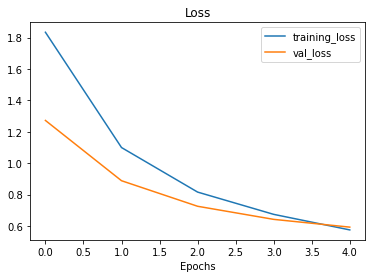

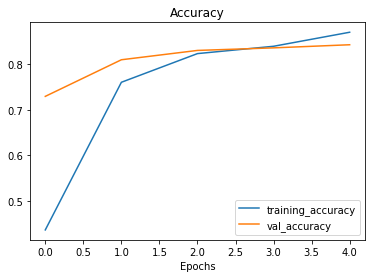

In [ ]:
#ukazeme si loss curves

plot_loss_curves(history_model_0)

##Feature vector

Demostrace Glob avg pooling

* ze zacatku mam None,7,7,1280
* potom mame None,1208

In [ ]:
input_shape = (1,4,4,3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input:\n {input_tensor}")

Random input:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]


In [ ]:
#Glob avg pooling

glob_avg_pool = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D glob_avg_pool:\n{glob_avg_pool}")

2D glob_avg_pool:
[[-0.09368646 -0.45840448 -0.2885598 ]]


In [ ]:
#shape 

print(f"Shape of input tensor:{input_tensor.shape}\n Shape of Glob_avg_pool:{glob_avg_pool.shape}")

Shape of input tensor:(1, 4, 4, 3)
 Shape of Glob_avg_pool:(1, 3)


##Replikace Glob_avg_pool

In [ ]:
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [ ]:
glob_max_pool = tf.keras.layers.GlobalMaxPooling2D()(input_tensor)
print(f"2D glob_max_pool:\n{glob_max_pool}")

2D glob_max_pool:
[[0.9058464 1.1603122 1.6994323]]


In [ ]:
tf.reduce_max(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

Feature vektor je reprezentace toho jak se nas model naucil a zredukuje to.

## Vicero experimentu s Transfer learning

1. model_1 feature extraction s 1% dat s augmentaci
2. model_2 to same az na to ze s 10% dat
3. model_3 pouziti FineTuning na 10% dat s augmentaci
4. model_4 pouziti FineTuning na 100% dat s augmentaci

###Priprava dat

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2021-08-03 17:34:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   129MB/s    in 1.0s    

2021-08-03 17:34:32 (129 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data("10_food_classes_1_percent.zip")

In [ ]:
train_dir_1 = "10_food_classes_1_percent/train"

test_dir_1 = "10_food_classes_1_percent/test"

In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There a

In [ ]:
IMG_SIZE = (224,224)
train_data_1 = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1,
                                                                   label_mode = "categorical",
                                                                   batch_size = 32,
                                                                   image_size = IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1,
                                                                label_mode = "categorical",
                                                                batch_size = BATCH_SIZE,
                                                                image_size = IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


###Pridani data augmentace primo do modelu

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
data_aug = keras.Sequential([
                             preprocessing.RandomFlip("horizontal"),
                             preprocessing.RandomRotation(0.2),
                             preprocessing.RandomZoom(0.2),
                             preprocessing.RandomHeight(0.2),
                             preprocessing.RandomWidth(0.2),
                             #preprocessing.Rescaling(1./255) #Normalizovani dat v pripade potreby
                             #preprocessing.Normalization()
], name = "data_augmentation")

Vyhody 
* Tim ze je data augmentace v modelu vyuziva GPU accelerace
* Augmentace je jen behem treningu ne behem predikce. Automaticky

###Vizualizace data augmentace

(-0.5, 453.5, 311.5, -0.5)

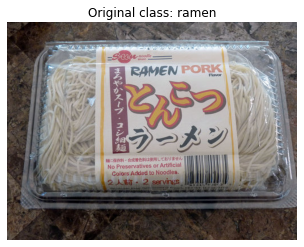

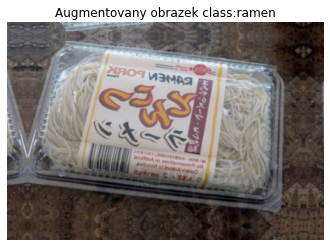

In [ ]:
#Ukazani nahodneho obrazku a provnani s originalem

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1.class_names)
target_dir = train_dir_1 +"/"+ target_class
random_img = random.choice(os.listdir(target_dir))
random_img_path = target_dir+"/"+random_img

img = mpimg.imread(random_img_path)
plt.imshow(img)
plt.title(f"Original class: {target_class}")
plt.axis(False)
#print(img)
#Ted ukazeme augmetovany obrazek

aug_img = data_aug(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(aug_img)/255)
plt.title(f"Augmentovany obrazek class:{target_class}")
plt.axis(False)

###Model 1

In [ ]:
#Input shape ,base mode, freez

input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#Udelani input vrstvy

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_aug(inputs)
x = base_model(x,training = False)

#Redukujeme
x = layers.GlobalAveragePooling2D()(x)

#Pokud mame cely model tak davame x do prvnich zavorek pokud jen vrstvu tak x davame az do druhych zavorek

#Vyhodnocovaci vrstva
outputs = layers.Dense(10,
                       activation="softmax",
                       name = "output_layer")(x)

model_1 = keras.Model(inputs,outputs)

model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.categorical_crossentropy,
                metrics = ["accuracy"])

history_model_1 = model_1.fit(train_data_1,
                              epochs = 5,
                              steps_per_epoch = len(train_data_1),
                              validation_data = test_data,
                              validation_steps = int(len(test_data)*0.25),
                              callbacks = [create_tensorboard_callback("/content/transfer_learning",
                                                                       "1_percent_model_1")])

Saving TensorBoard log files to: transefr_learning/1_percent_model_1/20210803-173437
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 12s 3s/step - loss: 2.4552 - accuracy: 0.0857 - val_loss: 2.2387 - val_accuracy: 0.1414
Epoch 2/5
3/3 [==============================] - 4s 1s/step - loss: 2.1149 - accuracy: 0.2714 - val_loss: 2.1043 - val_accuracy: 0.2484
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9497 - accuracy: 0.3714 - val_loss: 1.9993 - val_accuracy: 0.3372
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.8127 - accuracy: 0.5143 - val_loss: 1.8992 - val_accuracy: 0.3980
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6420 - accuracy: 0.6286 - val_loss: 1.8286 - val_accuracy: 0.4211


In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 1.8312 - accuracy: 0.4328


[1.8312262296676636, 0.4327999949455261]

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


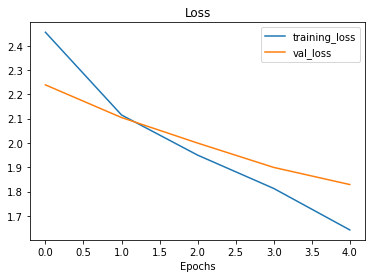

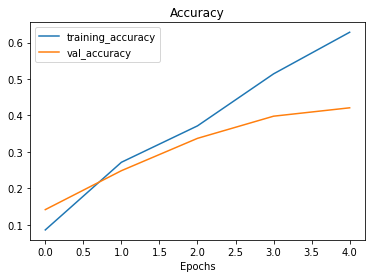

In [ ]:
plot_loss_curves(history_model_1)

In [ ]:
import tensorflow as tf


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3),name = "input_layer")
#training = False - je kvuli batch normalizaci abychom se ujistili ze se nebude menit
x = data_aug(inputs)
x = base_model(x,training = False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10,activation="softmax",name = "output_layer")(x)

model_2 = tf.keras.Model(inputs,outputs)

In [ ]:
base_model.summary()

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


###Pridani Checkpointu do modelu

In [ ]:
check_path = "ten_per_model_check/checkpoint"
#Budeme ukladat jen vahy ne cely model kvuli casu
checkpoint_callbacks = tf.keras.callbacks.ModelCheckpoint(check_path,
                                                          save_weights_only= True,
                                                          save_freq = "epoch", #Kazdou epochu
                                                          verbose = 1)

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.categorical_crossentropy,
                metrics = ["accuracy"])
history_model_2 = model_2.fit(train_data_10,
                              epochs = 5,
                              steps_per_epoch = len(train_data_10),
                              validation_data = test_data,
                              validation_steps = int(len(test_data)*0.25 ),
                              callbacks = [create_tensorboard_callback("/content/transfer_learning","10_percent_model_2_aug"),checkpoint_callbacks])

Saving TensorBoard log files to: /content/transfer_learning/10_percent_model_2_aug/20210803-191952
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 13s 317ms/step - loss: 1.9669 - accuracy: 0.3760 - val_loss: 1.4473 - val_accuracy: 0.6480

Epoch 00001: saving model to ten_per_model_check/checkpoint
Epoch 2/5
24/24 [==============================] - 6s 246ms/step - loss: 1.3356 - accuracy: 0.6720 - val_loss: 1.0370 - val_accuracy: 0.7615

Epoch 00002: saving model to ten_per_model_check/checkpoint
Epoch 3/5
24/24 [==============================] - 6s 237ms/step - loss: 1.0387 - accuracy: 0.7240 - val_loss: 0.8377 - val_accuracy: 0.7911

Epoch 00003: saving model to ten_per_model_check/checkpoint
Epoch 4/5
24/24 [==============================] - 6s 254ms/step - loss: 0.8721 - accuracy: 0.7720 - val_loss: 0.7622 - val_accuracy: 0.8109

Epoch 00004: saving model to ten_per_model_check/checkpoint
Epoch 5/5
24/24 [==============================] - 6s 236ms/step - loss: 0.7802 - accuracy: 0.8040 - val_loss: 0.6725 - val_accuracy: 0.8174

Epoch 00005: saving model to ten_per_model_check/checkpoint

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 107ms/step - loss: 0.6892 - accuracy: 0.8080


[0.6891705989837646, 0.8080000281333923]

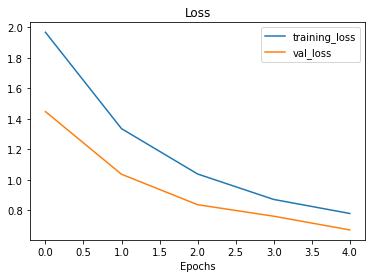

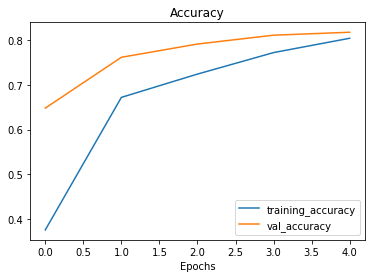

In [ ]:
plot_loss_curves(history_model_2)

###Nacteni Checkpoint vahy

In [ ]:
model_2.load_weights(check_path)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 107ms/step - loss: 0.6892 - accuracy: 0.8080


[0.6891706585884094, 0.8080000281333923]

In [ ]:
#Loss value neni stejna je to zpusobene tim jak PC uklada cisla (lise se velice malo)

###Model 3 Fine tuning

* Unfreezneme cast predtrenovaneho modelu. Vetsinou se Unfreezuje ke konci modelu kvuli tomu ze konec se uci vicero detailu.
* Nejlepsi je nejdrive udelat feature extraction a az pak delat fine tune (unfreeze)  

In [ ]:
#zkontrolovat vrstvy
model_2.layers

In [ ]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7facda259550> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fad6c0610d0> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7fac776396d0> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7fac77597fd0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fac775e4f50> True


In [ ]:
#Kolik je v nasem backbone modelu vrstev a jsou trenovatelne ? 
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
#Poslednich 10 vrstev pretvorime na trainable True
#vsechnou True
base_model.trainable = True

#Dat vsechny na False krome poslednich 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

#Musime recompilnout pokazde kdyz udelame nejsou zmenu v layers

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),#Nechceme drasticke zmeny v jiz naucenych paternech tudiz learning rate bude mensi vetsinou o /10
                loss = tf.keras.losses.categorical_crossentropy,
                metrics = ["accuracy"])

In [ ]:
#Kolik je tam ted trenovatelnych
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
print(len(model_2.layers[2].trainable_variables))

10


In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
normalization_3 (Normalization) (None, None, None, 3 7           rescaling_3[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization_3[0][0]            
_____________________________________________________________________________________

In [ ]:
#Fine tune na dalsich 5 epochach
initial_epoch = 5 
fine_tune_epochs = initial_epoch + 5

history_fine_model_2 = model_2.fit(train_data_10,
                                   epochs = 10,
                                   validation_data = test_data,
                                   validation_steps = int(0.25*len(test_data)),
                                   initial_epoch = history_model_2.epoch[-1],#Start training from last epoch where the model stops
                                   callbacks = [create_tensorboard_callback("/content/transfer_learning","10_fine_tune_model_2")]) 

Saving TensorBoard log files to: /content/transfer_learning/10_fine_tune_model_2/20210803-192057
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 13s 328ms/step - loss: 0.6922 - accuracy: 0.7867 - val_loss: 0.5562 - val_accuracy: 0.8257
Epoch 6/10
24/24 [==============================] - 6s 233ms/step - loss: 0.5452 - accuracy: 0.8387 - val_loss: 0.5142 - val_accuracy: 0.8405
Epoch 7/10
24/24 [==============================] - 6s 242ms/step - loss: 0.4844 - accuracy: 0.8507 - val_loss: 0.4714 - val_accuracy: 0.8470
Epoch 8/10
24/24 [==============================] - 6s 218ms/step - loss: 0.4406 - accuracy: 0.8707 - val_loss: 0.4604 - val_accuracy: 0.8454
Epoch 9/10
24/24 [==============================] - 6s 229ms/step - loss: 0.3913 - accuracy: 0.8933 - val_loss: 0.5004 - val_accuracy: 0.8487
Epoch 10/10
24/24 [==============================] - 6s 245ms/step - loss: 0.3677 - accuracy: 0.8893 - val_loss: 0.5000 - val_accuracy: 0.8421


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 104ms/step - loss: 0.5072 - accuracy: 0.8308


[0.5072165727615356, 0.8307999968528748]

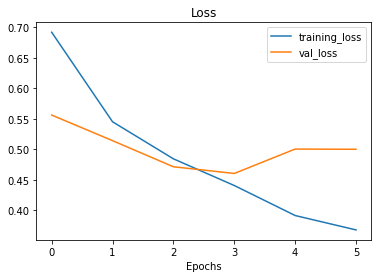

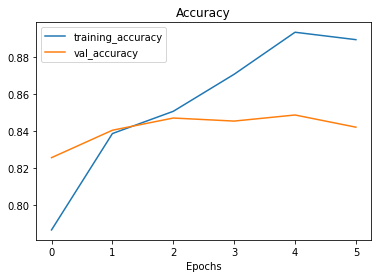

In [ ]:
plot_loss_curves(history_fine_model_2)

In [ ]:
def compare_history(original, new_history, initial_epoch =5):

  acc = original.history["accuracy"]
  loss = original.history["loss"]

  val_acc = original.history["val_accuracy"]
  val_loss = original.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label = "Training Accuracy")
  plt.plot(total_val_acc,label = "Validation Accuracy")
  plt.plot([initial_epoch-1,initial_epoch-1],plt.ylim(),label="Start Fine Tuning")
  plt.legend(loc = "lower right")
  plt.title("Training and Validation Accuracy")

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss,label = "Training Loss")
  plt.plot(total_val_loss,label = "Validation Loss")
  plt.plot([initial_epoch-1,initial_epoch-1],plt.ylim(),label="Start Fine Tuning")
  plt.legend(loc = "upper right")
  plt.title("Training and Validation Loss")



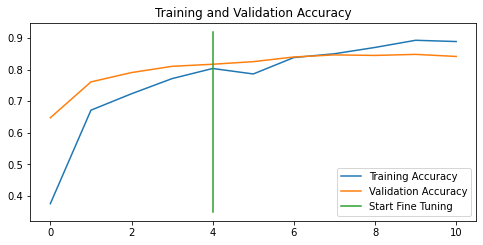

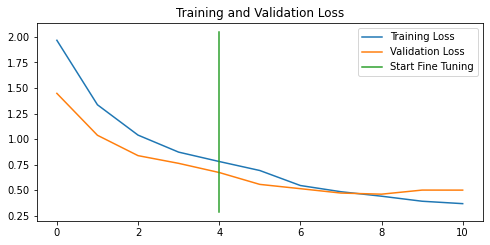

In [ ]:
compare_history(history_model_2,history_fine_model_2)

###Model 4

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-08-03 18:37:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   249MB/s    in 2.0s    

2021-08-03 18:37:54 (249 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
unzip_data("10_food_classes_all_data.zip")

In [ ]:
walk_through_dir("/content/10_food_classes_all_data")

There are 2 directories and 0 images in '/content/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/train'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/trai

In [ ]:
 train_dir_100 = "/content/10_food_classes_all_data/train"
 test_dir_100 = "/content/10_food_classes_all_data/test"

In [ ]:
BATCH_SIZE = 32
IMG_SHAPE = (224,224)

train_data_100 = tf.keras.preprocessing.image_dataset_from_directory(train_dir_100,
                                                                     label_mode = "categorical",
                                                                     batch_size = BATCH_SIZE,
                                                                     image_size = IMG_SHAPE
                                                                     )
test_data_100 = tf.keras.preprocessing.image_dataset_from_directory(test_dir_100,
                                                                    label_mode = "categorical",
                                                                    batch_size = BATCH_SIZE,
                                                                    image_size = IMG_SHAPE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
data_aug_100 = tf.keras.models.Sequential([
                                           tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                           preprocessing.RandomHeight(0.2),
                                           preprocessing.RandomWidth(0.2),
                                           preprocessing.RandomRotation(0.2),
                                           #preprocessing.RandomZoom(0.2)
])

base_model_100 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_100.trainable = False

inputs_100 = tf.keras.layers.Input(shape=(224,224,3),name = "input_layer")

x = data_aug_100(inputs_100)
x = base_model_100(x, training = False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs_100 = layers.Dense(10,activation="softmax",name= "ouput_layer")(x)

model_4 = tf.keras.Model(inputs_100,outputs_100)

model_4.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.categorical_crossentropy,
                metrics = ["accuracy"])

In [ ]:
initial_epoch = 5
fine_tune_epochs = initial_epoch +5
history_model_4 = model_4.fit(train_data_100,
                              epochs = initial_epoch,
                              steps_per_epoch = len(train_data_100),
                              validation_data = test_data_100,
                              validation_steps = int(0.25*len(test_data_100)),
                              callbacks = [create_tensorboard_callback("/content/transfer_learning","model_4_full")])

Saving TensorBoard log files to: /content/transfer_learning/model_4_full/20210803-193413
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 41s 155ms/step - loss: 1.0237 - accuracy: 0.6969 - val_loss: 0.4627 - val_accuracy: 0.8734
Epoch 2/5
235/235 [==============================] - 33s 137ms/step - loss: 0.6392 - accuracy: 0.8045 - val_loss: 0.3859 - val_accuracy: 0.8964
Epoch 3/5
235/235 [==============================] - 34s 143ms/step - loss: 0.5642 - accuracy: 0.8253 - val_loss: 0.3642 - val_accuracy: 0.8816
Epoch 4/5
235/235 [==============================] - 33s 138ms/step - loss: 0.5268 - accuracy: 0.8347 - val_loss: 0.3243 - val_accuracy: 0.8980
Epoch 5/5
235/235 [==============================] - 33s 138ms/step - loss: 0.4922 - accuracy: 0.8447 - val_loss: 0.3429 - val_accuracy: 0.8947


In [ ]:
model_4.evaluate(test_data_100)

79/79 [==============================] - 9s 106ms/step - loss: 0.3493 - accuracy: 0.8916


[0.34925517439842224, 0.8916000127792358]

In [ ]:
base_model_100.trainable = True

for layer in base_model_100.layers[:-10]:
  layer.trainable = False

In [ ]:
base_model_100.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_9 (Rescaling)         (None, None, None, 3 0           input_10[0][0]                   
__________________________________________________________________________________________________
normalization_9 (Normalization) (None, None, None, 3 7           rescaling_9[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization_9[0][0]            
_____________________________________________________________________________________

In [ ]:

model_4.compile(optimizer = tf.keras.optimizers.Adam(0.0001),
                loss = tf.keras.losses.categorical_crossentropy,
                metrics = ["accuracy"])

In [ ]:
print(len(model_4.layers[2].trainable_variables))

10


In [ ]:
history_model_4.epoch[-1]

4

In [ ]:
history_model_4_fine = model_4.fit( model_4.fit(train_data_100,
                              epochs = fine_tune_epochs,
                              steps_per_epoch = len(train_data_100),
                              validation_data = test_data_100,
                              validation_steps = int(0.25*len(test_data_100)),
                              initial_epoch = history_model_4.epoch[-1],
                              callbacks = [create_tensorboard_callback("/content/transfer_learning","model_4_full_fine_tune")]
                              
                              ))

Saving TensorBoard log files to: /content/transfer_learning/model_4_full_fine_tune/20210803-194714
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 33s 139ms/step - loss: 0.2507 - accuracy: 0.9188 - val_loss: 0.2696 - val_accuracy: 0.9112
Epoch 6/10
235/235 [==============================] - 33s 139ms/step - loss: 0.2234 - accuracy: 0.9329 - val_loss: 0.2733 - val_accuracy: 0.9062
Epoch 7/10
235/235 [==============================] - 31s 132ms/step - loss: 0.2076 - accuracy: 0.9348 - val_loss: 0.2654 - val_accuracy: 0.9211
Epoch 8/10
235/235 [==============================] - 33s 138ms/step - loss: 0.2011 - accuracy: 0.9357 - val_loss: 0.2356 - val_accuracy: 0.9309
Epoch 9/10
235/235 [==============================] - 32s 136ms/step - loss: 0.1757 - accuracy: 0.9500 - val_loss: 0.2613 - val_accuracy: 0.9128
Epoch 10/10
235/235 [==============================] - 32s 135ms/step - loss: 0.1699 - accuracy: 0.9464 - val_loss: 0.2627 - val_accuracy: 0.9276


ValueError: ignored

In [ ]:
compare_history(history_model_4,history_model_4_fine)

In [ ]:
model_2.load_weights(check_path)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.6892 - accuracy: 0.8080


[0.6891705393791199, 0.8080000281333923]

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
                loss = tf.keras.losses.categorical_crossentropy,
                metrics = ["accuracy"])

In [ ]:
model_4_fit_from_model_2 = model_2.fit(train_data_100,
                                       epochs = fine_tune_epochs,
                                       steps_per_epoch = len(train_data_100),
                                       validation_data = test_data_100,
                                       validation_steps = int(0.25*len(test_data_100)),
                                       initial_epoch = history_model_2.epoch[-1],
                                       callbacks = [create_tensorboard_callback("/content/transfer_learning","model_4_fine_from_model_2")])

Saving TensorBoard log files to: /content/transfer_learning/model_4_fine_from_model_2/20210803-192837
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 38s 140ms/step - loss: 0.6791 - accuracy: 0.7817 - val_loss: 0.3378 - val_accuracy: 0.8947
Epoch 6/10
235/235 [==============================] - 36s 153ms/step - loss: 0.4718 - accuracy: 0.8440 - val_loss: 0.3126 - val_accuracy: 0.8964
Epoch 7/10
235/235 [==============================] - 35s 146ms/step - loss: 0.3843 - accuracy: 0.8709 - val_loss: 0.3377 - val_accuracy: 0.8947
Epoch 8/10
235/235 [==============================] - 35s 148ms/step - loss: 0.3094 - accuracy: 0.8971 - val_loss: 0.2889 - val_accuracy: 0.9095
Epoch 9/10
235/235 [==============================] - 35s 146ms/step - loss: 0.2674 - accuracy: 0.9100 - val_loss: 0.2921 - val_accuracy: 0.9079
Epoch 10/10
235/235 [==============================] - 35s 147ms/step - loss: 0.2263 - accuracy: 0.9235 - val_loss: 0.4543 - val_accuracy: 0.8701


In [ ]:
model_2.evaluate(test_data_100)

79/79 [==============================] - 9s 109ms/step - loss: 0.4436 - accuracy: 0.8712


[0.44361767172813416, 0.8712000250816345]

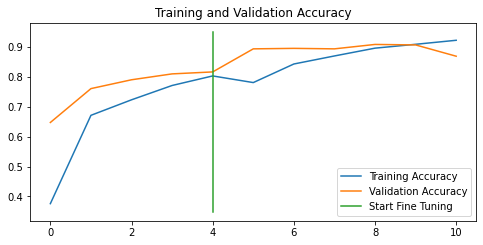

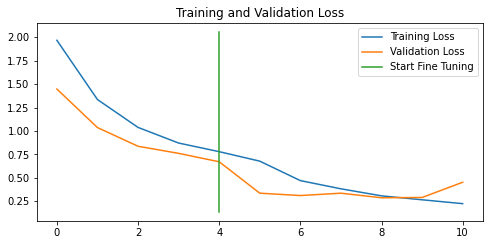

In [ ]:
compare_history(history_model_2,model_4_fit_from_model_2)

##View on tensorboard

In [ ]:
!tensorboard dev upload --logdir /content/transfer_learning/ --name "Transfer Learning Experiments" --description "Different learning with data fine tuning etc." --one_shot


2021-08-03 19:56:49.460373: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/transfer_learning/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3

#Cviceni


1. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.

2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

4. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [ ]:
import helper_functions as hf
import tensorflow as tf 
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import applications
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Input

In [ ]:
hf.unzip_data("/content/10_food_classes_10_percent.zip")

In [ ]:
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [ ]:
IMG_SIZE = (224,224)
IMG_SHAPE = (224,224,3)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = "categorical",
                                                                 batch_size = BATCH_SIZE,
                                                                 image_size = IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                batch_size = BATCH_SIZE,
                                                                image_size = IMG_SIZE
                                                                )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
backbone = applications.EfficientNetB0(include_top=False)
backbone.trainable = False

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
inputs = Input(IMG_SHAPE,name="input_layer")
x = backbone(inputs)
x = GlobalAveragePooling2D(name = "glob_avg")(x)
outputs = Dense(10,activation="softmax",name = "output_layer")(x)

model_exp = tf.keras.Model(inputs,outputs)

In [ ]:
model_exp.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
glob_avg (GlobalAveragePooli (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model_exp.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss = tf.keras.losses.categorical_crossentropy,
                  metrics = ["accuracy"])

In [ ]:
check_call = tf.keras.callbacks.ModelCheckpoint("/content/Checkpoints/",save_weights_only=True)

In [ ]:
initial_epochs = 10
finetune_epochs = initial_epochs + 10

In [ ]:
history_exp = model_exp.fit(train_data,
                            epochs = 10,
                            steps_per_epoch = len(train_data),
                            validation_data = test_data,
                            validation_steps = int(0.25*len(test_data)),
                            callbacks = [hf.create_tensorboard_callback("/content/Tensorboard/","EXP_1_non_finetune"),check_call])

Saving TensorBoard log files to: /content/Tensorboard//EXP_1_non_finetune/20210804-155829
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 6s 241ms/step - loss: 0.1648 - accuracy: 0.9813 - val_loss: 0.4687 - val_accuracy: 0.8553
Epoch 2/10
24/24 [==============================] - 5s 208ms/step - loss: 0.1612 - accuracy: 0.9827 - val_loss: 0.4819 - val_accuracy: 0.8651
Epoch 3/10
24/24 [==============================] - 5s 207ms/step - loss: 0.1622 - accuracy: 0.9827 - val_loss: 0.4616 - val_accuracy: 0.8618
Epoch 4/10
24/24 [==============================] - 5s 210ms/step - loss: 0.1552 - accuracy: 0.9773 - val_loss: 0.4541 - val_accuracy: 0.8602
Epoch 5/10
24/24 [==============================] - 5s 207ms/step - loss: 0.1380 - accuracy: 0.9813 - val_loss: 0.4563 - val_accuracy: 0.8668
Epoch 6/10
24/24 [==============================] - 5s 197ms/step - loss: 0.1389 - accuracy: 0.9800 - val_loss: 0.4468 - val_accuracy: 0.8569
Epoch 7/10
24/24 [==============================] - 5s 197ms/step - loss: 0.1275 - accuracy: 0.9920 - val_loss: 0.4468 - val_accuracy: 0.8635
Epoch 8/10
24/24 

In [ ]:
model_exp.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 0.4286 - accuracy: 0.8596


[0.4285605549812317, 0.8596000075340271]

In [ ]:
backbone.trainable = True

In [ ]:
for layer in model_exp.layers[1].layers[:-20]:
  layer.trainable = False

In [ ]:
for i,layer in enumerate(model_exp.layers[1].layers):
  print(i,layer.name,layer.trainable)

In [ ]:
model_exp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.categorical_crossentropy,
                  metrics = ["accuracy"])

In [ ]:
history_exp_2 = model_exp.fit(train_data,
                              epochs = finetune_epochs,
                              initial_epoch = history_exp.epoch[-1], 
                              steps_per_epoch = len(train_data),
                              validation_data = test_data,
                              validation_steps = int(len(test_data)*0.25),
                              callbacks = [hf.create_tensorboard_callback("/content/Tensorboard/","EXP_2_finetune_20")]
                              )

Saving TensorBoard log files to: /content/Tensorboard//EXP_2_finetune_20/20210804-160855
Epoch 10/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 14s 301ms/step - loss: 0.5163 - accuracy: 0.8880 - val_loss: 0.4307 - val_accuracy: 0.8750
Epoch 11/20
24/24 [==============================] - 5s 210ms/step - loss: 0.2691 - accuracy: 0.9667 - val_loss: 0.4360 - val_accuracy: 0.8635
Epoch 12/20
24/24 [==============================] - 5s 200ms/step - loss: 0.2023 - accuracy: 0.9720 - val_loss: 0.4294 - val_accuracy: 0.8602
Epoch 13/20
24/24 [==============================] - 5s 211ms/step - loss: 0.1576 - accuracy: 0.9840 - val_loss: 0.4382 - val_accuracy: 0.8536
Epoch 14/20
24/24 [==============================] - 5s 214ms/step - loss: 0.1157 - accuracy: 0.9920 - val_loss: 0.4414 - val_accuracy: 0.8553
Epoch 15/20
24/24 [==============================] - 5s 210ms/step - loss: 0.1039 - accuracy: 0.9880 - val_loss: 0.4258 - val_accuracy: 0.8684
Epoch 16/20
24/24 [==============================] - 5s 208ms/step - loss: 0.0745 - accuracy: 0.9987 - val_loss: 0.4578 - val_accuracy: 0.8635
Epoch 17/2

In [ ]:
model_exp.evaluate(test_data)

79/79 [==============================] - 9s 105ms/step - loss: 0.4179 - accuracy: 0.8584


[0.41790199279785156, 0.8583999872207642]

In [ ]:
model_exp.load_weights("/content/Checkpoints/")

In [ ]:
model_exp.evaluate(test_data)

79/79 [==============================] - 9s 105ms/step - loss: 0.4286 - accuracy: 0.8596


[0.42856064438819885, 0.8596000075340271]

In [ ]:
backbone.trainable = True

In [ ]:
for layer in backbone.layers[:-30]:
  layer.trainable = False

In [ ]:
for i,layer in enumerate(backbone.layers):
  print(i,layer.name,layer.trainable)

In [ ]:
model_exp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.categorical_crossentropy,
                  metrics = ["accuracy"])

In [ ]:
history_exp_3 = model_exp.fit(train_data,
                              epochs = finetune_epochs,
                              initial_epoch = history_exp.epoch[-1],
                              steps_per_epoch = len(train_data),
                              validation_data = test_data,
                              validation_steps = int(len(test_data)*0.25),
                              callbacks = [hf.create_tensorboard_callback("/content/Tensorboard/","EXP_3_finetune_30")]
                              )

Saving TensorBoard log files to: /content/Tensorboard//EXP_3_finetune_30/20210804-162309
Epoch 10/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 13s 316ms/step - loss: 0.5522 - accuracy: 0.8573 - val_loss: 0.4470 - val_accuracy: 0.8618
Epoch 11/20
24/24 [==============================] - 5s 216ms/step - loss: 0.2937 - accuracy: 0.9547 - val_loss: 0.4435 - val_accuracy: 0.8684
Epoch 12/20
24/24 [==============================] - 5s 216ms/step - loss: 0.2129 - accuracy: 0.9720 - val_loss: 0.4073 - val_accuracy: 0.8684
Epoch 13/20
24/24 [==============================] - 5s 215ms/step - loss: 0.1494 - accuracy: 0.9853 - val_loss: 0.4156 - val_accuracy: 0.8799
Epoch 14/20
24/24 [==============================] - 5s 208ms/step - loss: 0.1308 - accuracy: 0.9893 - val_loss: 0.4201 - val_accuracy: 0.8799
Epoch 15/20
24/24 [==============================] - 6s 217ms/step - loss: 0.0973 - accuracy: 0.9933 - val_loss: 0.4376 - val_accuracy: 0.8668
Epoch 16/20
24/24 [==============================] - 6s 217ms/step - loss: 0.0806 - accuracy: 0.9933 - val_loss: 0.4230 - val_accuracy: 0.8766
Epoch 17/2

In [ ]:
model_exp.evaluate(test_data)

79/79 [==============================] - 9s 107ms/step - loss: 0.4304 - accuracy: 0.8552


[0.43035057187080383, 0.8551999926567078]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os

def predict (dataset ,class_names, model, img_shape = (224,224)):
  class_name = random.choice(class_names)
  path = dataset + random.choice(os.listdir(dataset)) + "/"+ class_name
  #print(path)
  image_path = os.listdir(path)
  image_path = path + "/" + random.choice(image_path)
  #print(image_path)
  image_show = plt.imread(image_path)
  image = tf.keras.preprocessing.image.load_img(image_path,target_size=img_shape)
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = np.array([image])
  probs = model.predict(image)
  prediction = np.argmax(probs)
  prediction_name = class_names[prediction]
  plt.imshow(image_show)
  plt.title(f"Predition: {prediction_name} Original: {class_name}")
  plt.axis(False)

In [ ]:
os.listdir("/content/10_food_classes_10_percent/"+ random.choice(os.listdir("/content/10_food_classes_10_percent/")))

['pizza',
 'chicken_curry',
 'ramen',
 'hamburger',
 'fried_rice',
 'grilled_salmon',
 'sushi',
 'ice_cream',
 'steak',
 'chicken_wings']

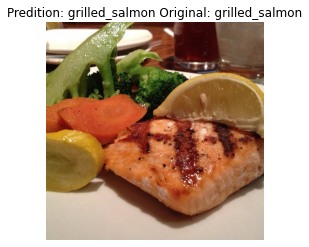

In [ ]:
predict("/content/10_food_classes_10_percent/",test_data.class_names,model_exp)